In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import host, username, password
from pydataset import data
import os
from env import get_db_url
from acquire import get_titanic_data, get_iris_data
from prepare import prep_iris
import scipy

# Data Acquisition

In [ ]:
df_iris = data('iris')

In [ ]:
#1a.) print the first 3 rows

In [ ]:
df_iris.head(3)

In [ ]:
#1b.) print the number of rows and columns (shape)

In [ ]:
df_iris.shape
print(f"The number of rows is {df_iris.shape[0]}, the number of columns is {df_iris.shape[-1]} ")

In [ ]:
#1c.) print the column names

In [ ]:
list(df_iris)

In [ ]:
df_iris.columns.to_list()

In [ ]:
#1d.) print the data type of each column

In [ ]:
df_iris.dtypes

In [ ]:
#1e.) print the summary statistics for each of the numeric variables. 
 #Would you recommend rescaling the data based on these statistics?

In [ ]:
stats = df_iris.describe().T
stats

In [ ]:
stats['range'] = stats['max'] - stats['min']
stats

In [ ]:
pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [ ]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [ ]:
#2a.) assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

In [ ]:
#2b.) print the number of rows of your original dataframe
print(f'the number of rows in the original data frame is {df_excel.shape[0]}')

In [ ]:
#2c.) print the first 5 column names
print(list(df_excel)[0:5])

In [ ]:
#2d.) print the column names that have a data type of object
print(df_excel.columns[df_excel.dtypes==object])

In [ ]:
#2e.) compute the range for each of the numeric variables.

In [ ]:
stats_ex = df_excel.describe().T
stats_ex['range'] = stats_ex['max'] - stats_ex['min']
stats_ex

In [ ]:
df_excel.select_dtypes('number').max() - df_excel.select_dtypes('number').min()

In [ ]:
#3.) https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing
#Turn into df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [ ]:
#3a.) print the first 3 rows
df_google.head(3)

In [ ]:
#3b.) print the number of rows and columns
print(f'the number of rows is {df_google.shape[0]}, and the number of columns is {df_google.shape[-1]}')

In [ ]:
#3c.) print the column names
print(df_google.columns.to_list())

In [ ]:
#3d.) print the data type of each column
df_google.dtypes

In [ ]:
#3e.) print the summary statistics for each of the numeric variables
df_google.describe()

In [ ]:
#3f.) print the unique values for each of your categorical variables

In [ ]:
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

In [ ]:
df_google.Survived.value_counts(dropna=False)

In [ ]:
df_google.Pclass.value_counts(dropna=False)

In [ ]:
df_google.Sex.value_counts(dropna=False)

In [ ]:
df_google.Embarked.value_counts(dropna=False)

In [ ]:
print(df_google.Survived.unique())
print(df_google.Pclass.unique())
print(df_google.Sex.unique())
print(df_google.SibSp.unique())
print(df_google.Parch.unique())
print(df_google.Embarked.unique())

In [ ]:
df_obj_only = df_google.select_dtypes(include='object')
for i in df_obj_only.columns:
     print(df_google[i].unique())

In [ ]:
titanic_df = get_titanic_data()

In [ ]:
iris_df = get_iris_data()

In [ ]:
os.path.isfile('titanic_df.csv')

In [ ]:
titanic_df.to_csv('titanic_df.csv')

In [ ]:
iris_df.to_csv('iris_df.csv')

# Data Preparation

In [ ]:
#1.) Use the function defined in acquire.py to load the iris data.
#from acquire import get_iris_data

In [ ]:
iris_df = get_iris_data()
iris_df

In [ ]:
#2.) Drop the species_id and measurement_id columns.
iris_df = iris_df.drop(columns = ['species_id', 'measurement_id'])
iris_df

In [ ]:
#3.) Rename the species_name column to just species.

In [ ]:
iris_df.rename(columns=({'species_name': 'species'}))

In [ ]:
#4.) Create dummy variables of the species name.

In [ ]:
pd.get_dummies(iris_df, prefix = ['species'])

In [ ]:
#5.) Create a function named prep_iris that accepts the untransformed iris data, 
#and returns the data with the transformations above applied.

In [ ]:
def clean_iris_data(iris_df):
    iris_df = iris_df.drop(columns = ['species_id', 'measurement_id'])
    iris_df = iris_df.rename(columns=({'species_name': 'species'}))
    iris_df = pd.get_dummies(iris_df, prefix = ['species'])
    return iris_df

In [ ]:
def prep_iris(iris_df):
    iris_df = clean_iris_data(iris_df)
    return iris_df

In [ ]:
df = get_iris_data()
df

In [ ]:
clean_iris_data(df)

In [ ]:
prep_iris(df)

In [ ]:
from prepare import clean_data, prep_iris

In [ ]:
clean_data(df)

In [ ]:
prep_iris(df)

# Exploratory Exercises

In [2]:
from sklearn.model_selection import train_test_split
from acquire import new_iris_data

In [3]:
#acquire
iris_df = get_iris_data()
iris_df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


In [4]:
#prepare
df = prep_iris(iris_df)
df

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


In [87]:
#split
train, test = train_test_split(df, test_size=0.2, random_state=123, stratify = df.species)
train, validate = train_test_split(train, train_size=0.7, random_state=123, stratify = train.species)

In [88]:
#checking for same number of columns throughout
print(df.shape, train.shape, validate.shape, test.shape)

(150, 7) (84, 7) (36, 7) (30, 7)


In [14]:
cat_vars = ['species']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
#histogram

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

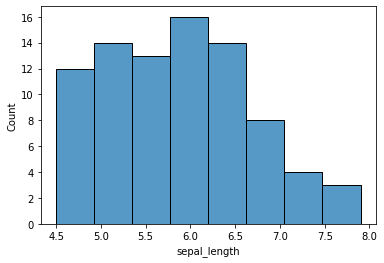

In [47]:
sns.histplot(train.sepal_length)

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

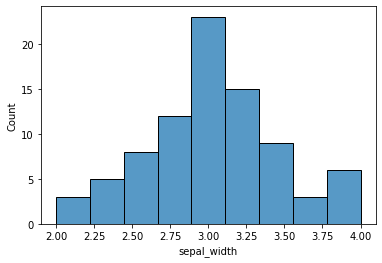

In [48]:
sns.histplot(train.sepal_width)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

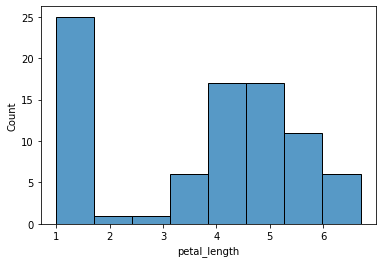

In [49]:
sns.histplot(train.petal_length)

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

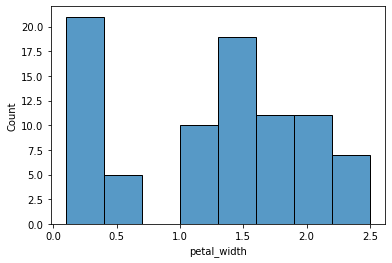

In [50]:
sns.histplot(train.petal_width)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

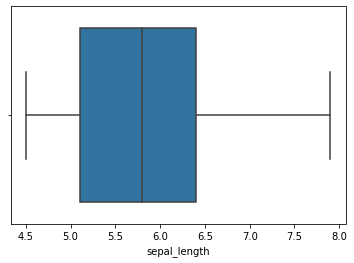

In [51]:
sns.boxplot(train.sepal_length)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width'>

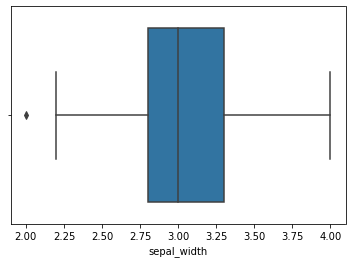

In [52]:
sns.boxplot(train.sepal_width)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length'>

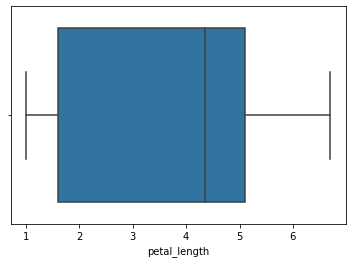

In [53]:
sns.boxplot(train.petal_length)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_width'>

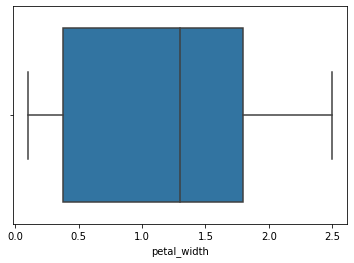

In [54]:
sns.boxplot(train.petal_width)

In [89]:
train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [90]:
train.sepal_width.describe()

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

In [91]:
train.petal_length.describe()

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

In [58]:
train.petal_width.describe()

count    84.000000
mean      1.211905
std       0.732450
min       0.100000
25%       0.375000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

In [92]:
train.value_counts('species')

species
virginica     28
versicolor    28
setosa        28
dtype: int64

<AxesSubplot:xlabel='species'>

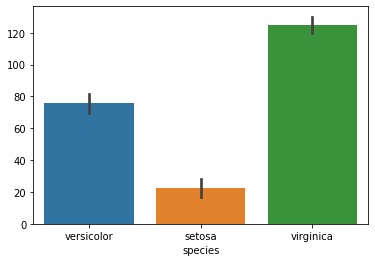

In [93]:
sns.barplot( x =train.species, y = train.index)

In [66]:
#sepal width varies the most, petals would probably be the most accurate for predicitng a type of plant. 

In [79]:
train.sepal_length.mean()

5.841666666666667

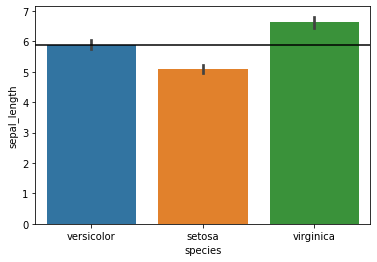

In [111]:
sns.barplot(data = train, y = 'sepal_length', x = 'species')
plt.axhline(y=train.sepal_length.mean(), color='black')
plt.show()

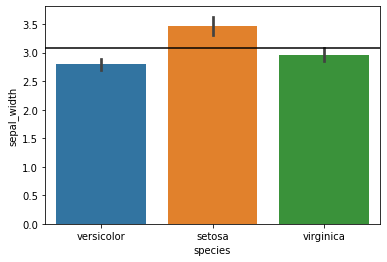

In [112]:
sns.barplot(data = train, y = 'sepal_width', x = 'species')
plt.axhline(y=train.sepal_width.mean(), color='black')

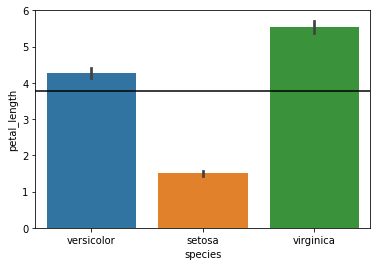

In [116]:
sns.barplot(data = train, y = 'petal_length', x = 'species')
plt.axhline(y=train.petal_length.mean(), color='black')

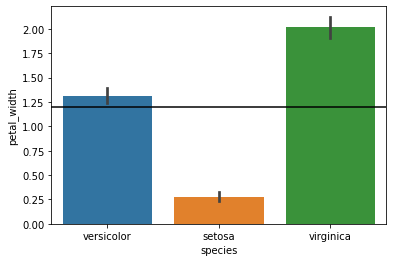

In [115]:
sns.barplot(data = train, y = 'petal_width', x = 'species')
plt.axhline(y=train.petal_width.mean(), color='black')

In [126]:
train[train.species=='setosa'].describe().drop(columns=['versicolor','virginica'])

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [128]:
train[train.species=='virginica'].describe().drop(columns=['versicolor','virginica'])

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [129]:
train[train.species=='versicolor'].describe().drop(columns=['versicolor','virginica'])

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


In [132]:
train[train.species=='virginica'].petal_width.mean()

2.0214285714285714

In [133]:
train[train.species=='versicolor'].petal_width.mean()

1.3142857142857145

In [135]:
from scipy import stats

In [137]:
stats.mannwhitneyu(train[train.species=='virginica'].petal_width, train[train.species=='versicolor'].petal_width)

MannwhitneyuResult(statistic=17.0, pvalue=3.235595834904965e-10)

In [138]:
#Reject null hypothesis, there is evidence to suggest the means of petal widths are different between virginica and versicolors

In [139]:
stats.mannwhitneyu(train[train.species=='virginica'].petal_length, train[train.species=='versicolor'].petal_length)

MannwhitneyuResult(statistic=7.5, pvalue=1.4739917857575313e-10)

In [ ]:
#Reject null hypothesis, there is evidence to suggest the means of petal lengths are different between virginica and versicolors

In [140]:
stats.mannwhitneyu(train[train.species=='virginica'].sepal_width, train[train.species=='versicolor'].sepal_width)

MannwhitneyuResult(statistic=274.0, pvalue=0.026286295699228482)

In [ ]:
#Fail to reject null hypothesis, there is evidence to suggest the means of sepal widths are not too much different between virginica and versicolors

In [141]:
stats.mannwhitneyu(train[train.species=='virginica'].sepal_length, train[train.species=='versicolor'].sepal_length)

MannwhitneyuResult(statistic=107.5, pvalue=1.541014598267054e-06)

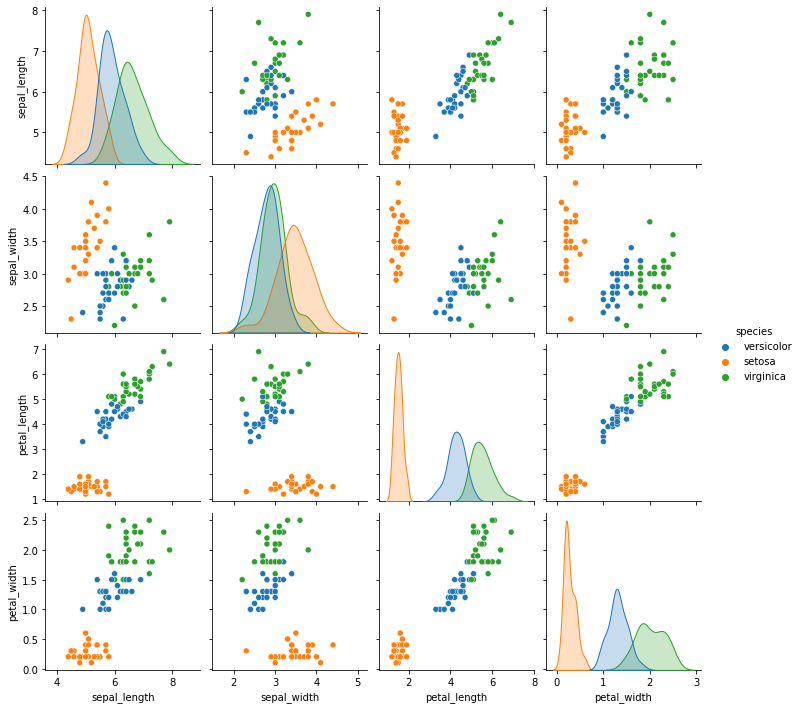

In [144]:
sns.pairplot(data=train.drop(columns=['versicolor', 'virginica']), hue='species')

In [162]:
dropped_train = train.drop(columns=['versicolor', 'virginica'])
dropped_train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
79,versicolor,5.7,2.6,3.5,1.0
36,setosa,5.5,3.5,1.3,0.2
133,virginica,6.3,2.8,5.1,1.5
95,versicolor,5.7,3.0,4.2,1.2
18,setosa,5.7,3.8,1.7,0.3


In [148]:
melt = dropped_train.melt(id_vars=['species'])
melt

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


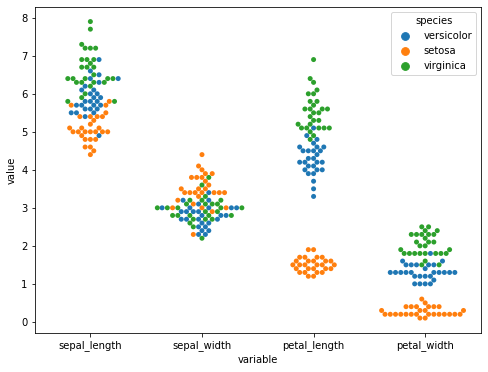

In [153]:
plt.figure(figsize=(8,6))
p = sns.swarmplot(x='variable',y='value',hue='species', data = melt)
plt.show()

In [ ]:
Ho: There is no difference in petal area between virginica and setosas.

In [163]:
#is the petal area signficantly different in virginica compared to versicolor?

dropped_train['petal_area'] = dropped_train.petal_width*dropped_train.petal_length

In [164]:
dropped_train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,petal_area
79,versicolor,5.7,2.6,3.5,1.0,3.50
36,setosa,5.5,3.5,1.3,0.2,0.26
133,virginica,6.3,2.8,5.1,1.5,7.65
95,versicolor,5.7,3.0,4.2,1.2,5.04
18,setosa,5.7,3.8,1.7,0.3,0.51


In [165]:
stats.mannwhitneyu(dropped_train[dropped_train.species=='virginica'].petal_area, dropped_train[dropped_train.species=='versicolor'].petal_area)

MannwhitneyuResult(statistic=4.5, pvalue=1.1321800903387935e-10)

In [166]:
#Reject the null hypothesis, there is evidence to suggest that petal area between virginicas and versicolors are significantly different. 

<AxesSubplot:xlabel='species', ylabel='petal_area'>

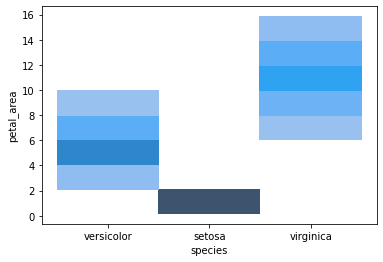

In [173]:
sns.histplot(x='species', y='petal_area', data = dropped_train)

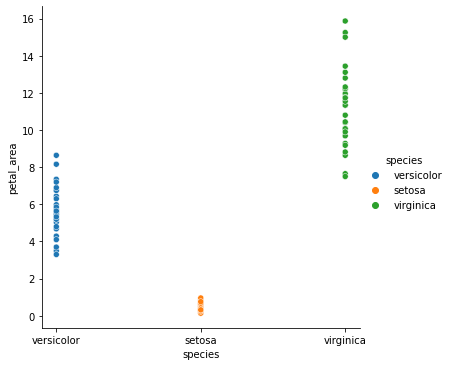

In [175]:
sns.relplot(x='species', y='petal_area', data=dropped_train, hue='species')

In [179]:
no_setosa = dropped_train[dropped_train.species!='setosa']

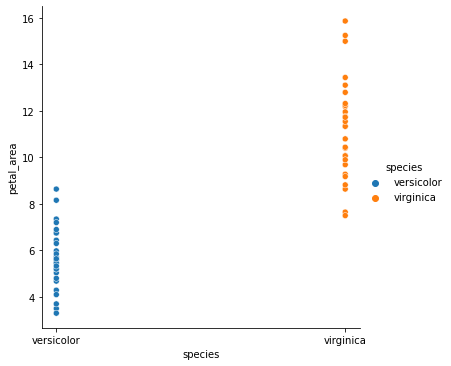

In [183]:
sns.relplot(x='species', y='petal_area', data=dropped_train[dropped_train.species!='setosa'], hue='species')

# Other Exploratory Exercise

In [204]:
#split
train, test = train_test_split(df, test_size=0.2, random_state=123, stratify = df.species)
train, validate = train_test_split(train, train_size=0.7, random_state=123, stratify = train.species)

<AxesSubplot:xlabel='variable', ylabel='value'>

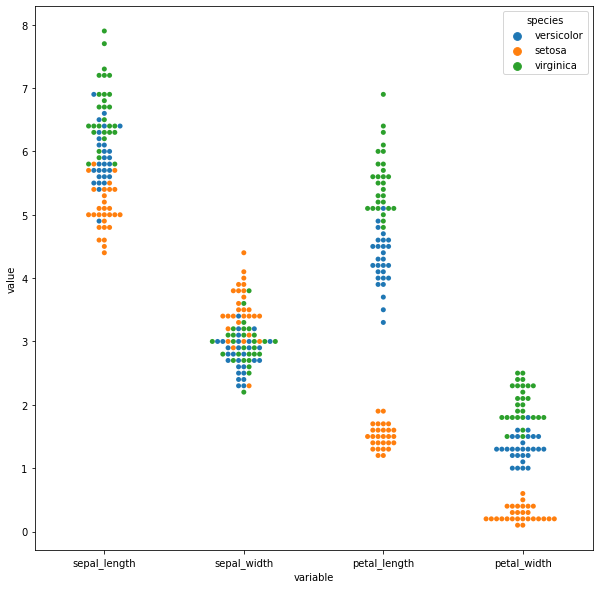

In [205]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=melt, x='variable', y='value', hue='species')

In [206]:
#creating area formulas
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

In [207]:
def scatter_by_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

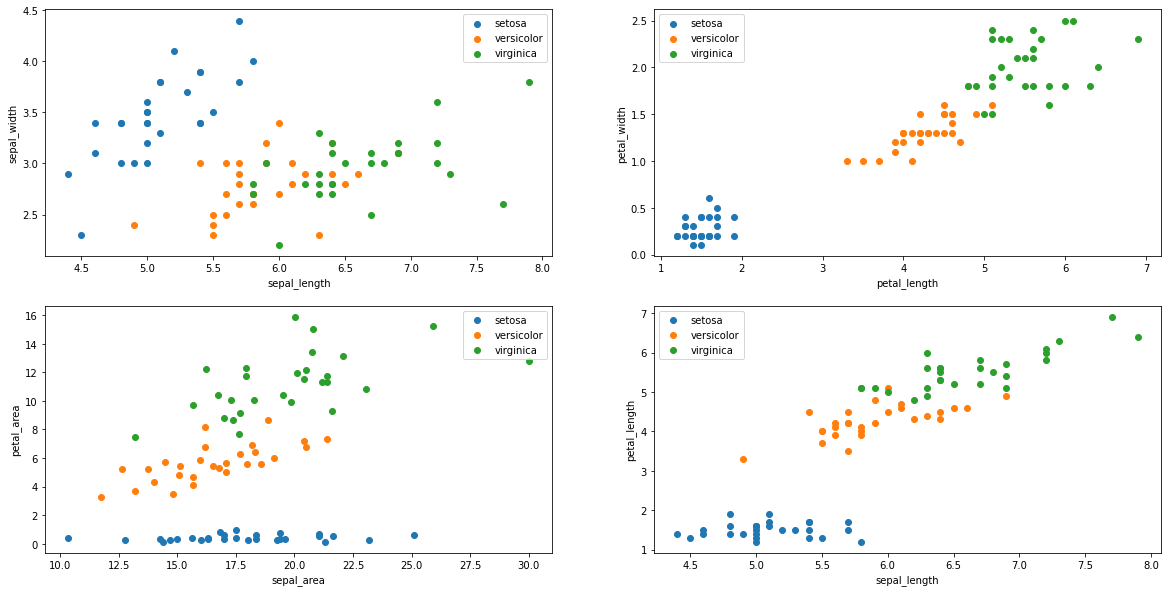

In [208]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
scatter_by_species('sepal_length', 'sepal_width')
plt.subplot(2, 2, 2)
scatter_by_species('petal_length', 'petal_width')
plt.subplot(2, 2, 3)
scatter_by_species('sepal_area', 'petal_area')
plt.subplot(2, 2, 4)
scatter_by_species('sepal_length', 'petal_length')

plt.show()

In [209]:
#4.) Create a heatmap of each variable layering correlation coefficient on top.

<AxesSubplot:>

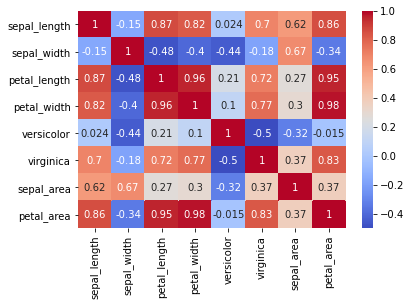

In [210]:
sns.heatmap(train.corr(), cmap='coolwarm', annot=True)

In [211]:
#5.) Create a scatter matrix visualizing the interaction of each variable.

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='versicolor', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='virginica', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_area', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_area', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='versicolor', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='virginica', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_area', ylabel='sepal_width'>,
      

<Figure size 2160x2160 with 0 Axes>

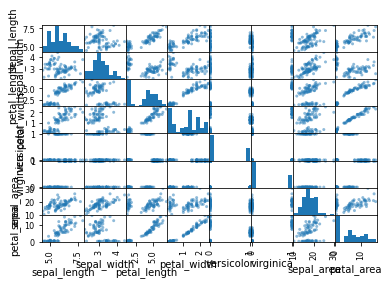

In [202]:
plt.figure(figsize=(30, 30))
pd.plotting.scatter_matrix(train)

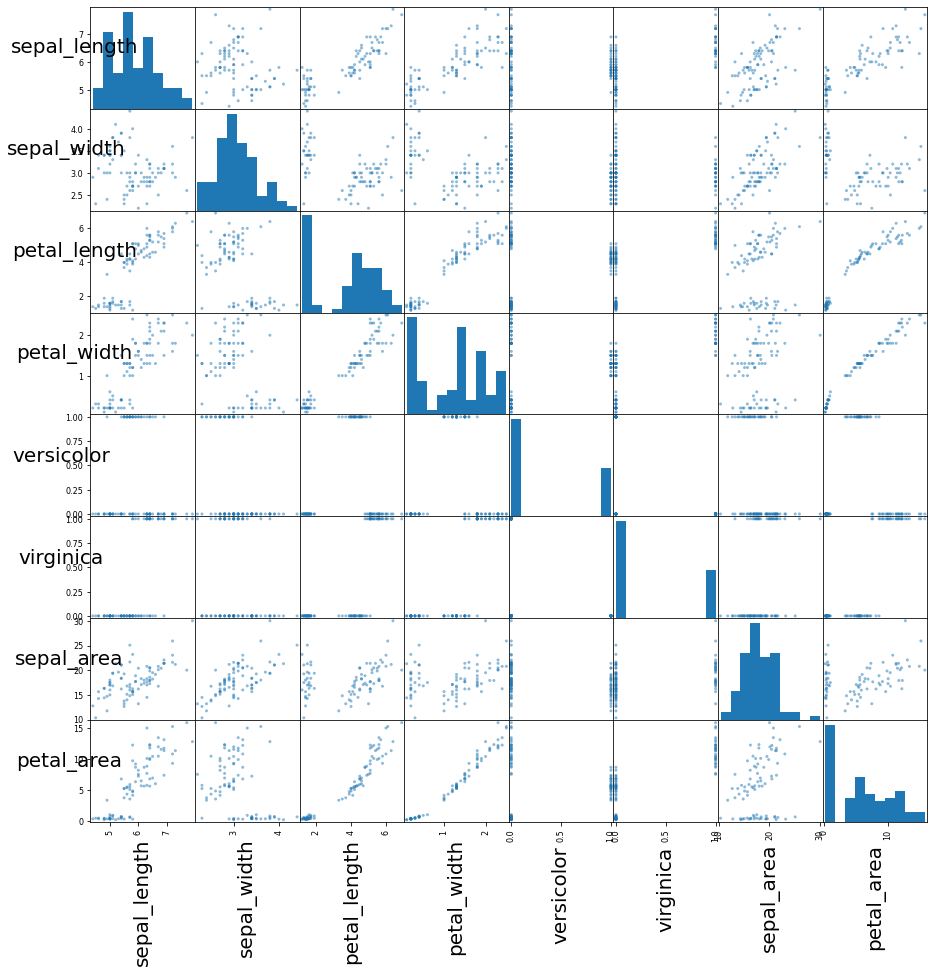

In [217]:
scatter_matrix = pd.plotting.scatter_matrix(
    train,
    figsize  = [15, 15]
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)

In [218]:
virginica = train[train.species=='virginica']
versicolor = train[train.species=='versicolor']

In [220]:
t, p = stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)

In [221]:
t, p

(5.656491804882077, 6.024259917536193e-07)

In [222]:
#Takeaways: sepal lengths have a good measure of defining between whether an iris is a virginica or a versicolor.

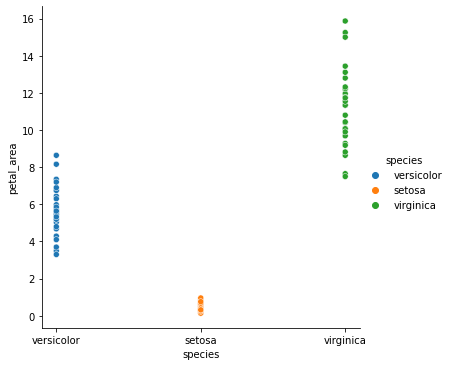

In [223]:
sns.relplot(x='species', y='petal_area', data=dropped_train, hue='species')

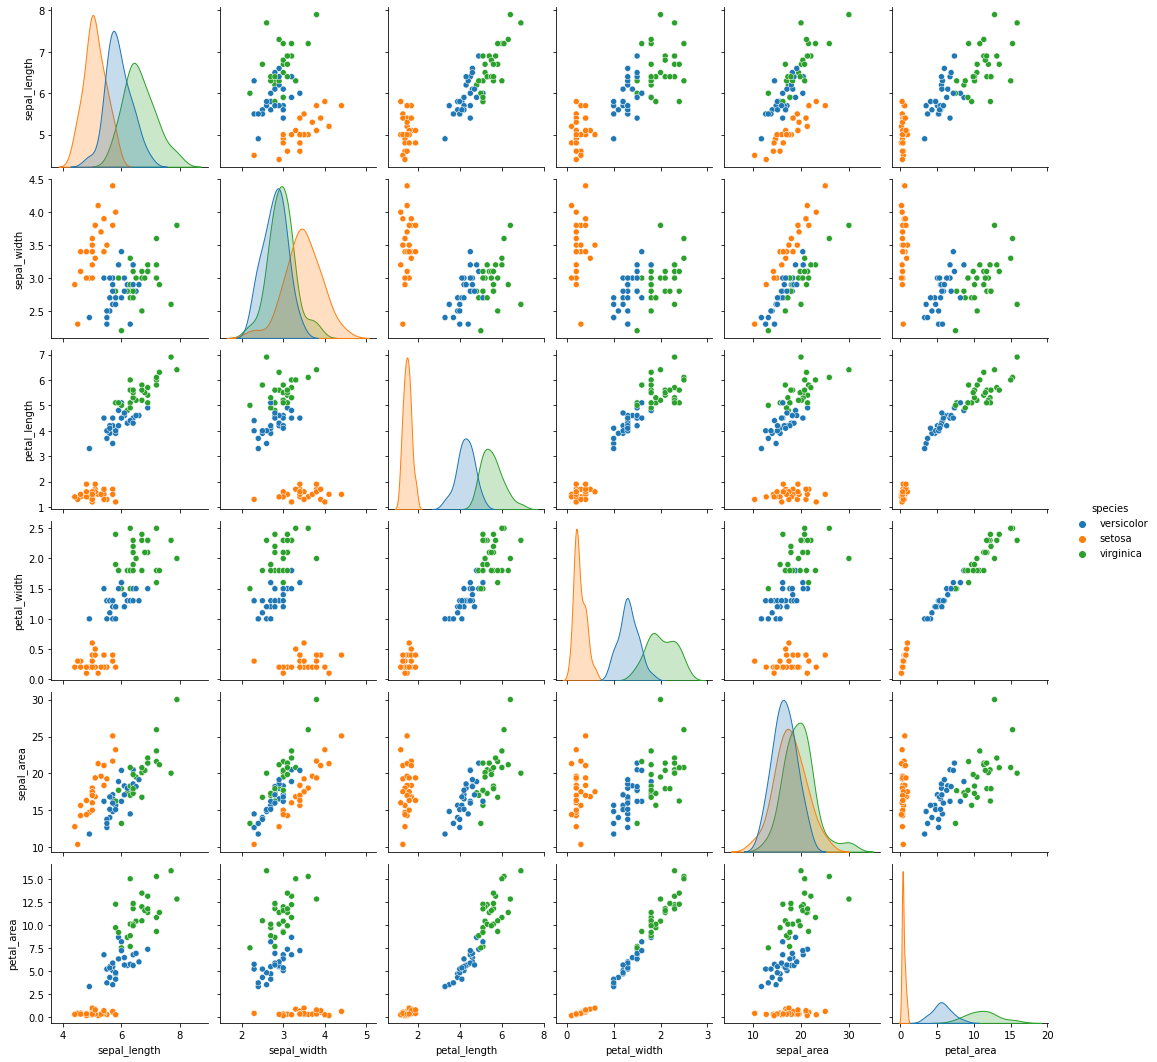

In [224]:
sns.pairplot(data=train.drop(columns=['versicolor', 'virginica']), hue='species')

In [225]:
#Mann whitney test

In [226]:
#for petal widths between virginica and versicolors
stats.mannwhitneyu(train[train.species=='virginica'].petal_width, train[train.species=='versicolor'].petal_width)

MannwhitneyuResult(statistic=17.0, pvalue=3.235595834904965e-10)

In [227]:
#for petal lengths between virginica and versicolors.
stats.mannwhitneyu(train[train.species=='virginica'].petal_length, train[train.species=='versicolor'].petal_length)

MannwhitneyuResult(statistic=7.5, pvalue=1.4739917857575313e-10)

In [228]:
#for sepal widths between virginica and versicolors
stats.mannwhitneyu(train[train.species=='virginica'].sepal_width, train[train.species=='versicolor'].sepal_width)

MannwhitneyuResult(statistic=274.0, pvalue=0.026286295699228482)

In [229]:
#for sepal lengths between virginica and versicolors
stats.mannwhitneyu(train[train.species=='virginica'].sepal_length, train[train.species=='versicolor'].sepal_length)

MannwhitneyuResult(statistic=107.5, pvalue=1.541014598267054e-06)